In [12]:
import sys, os
# 1) Movernos al root del proyecto (una carpeta arriba de notebooks/)
os.chdir(os.path.abspath(os.path.join('..')))
print("Working dir cambiado a:", os.getcwd())

# 2) Añadir src/ a sys.path para poder importar tus módulos
sys.path.insert(0, os.path.abspath(os.path.join('src')))
print("src añadido a sys.path:", sys.path[0])
sys.path.insert(0, os.path.abspath(os.path.join('..','src')))
from modeling.evaluate_time_series import evaluate_months

Working dir cambiado a: c:\Users\nicol\Desktop\Magister\Desarrollo de proyectos\Tarea-1-Desarrollo-de-proyectos
src añadido a sys.path: c:\Users\nicol\Desktop\Magister\Desarrollo de proyectos\Tarea-1-Desarrollo-de-proyectos\src


In [ ]:
from data.dataset import cargar_parquet

url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-01.parquet'
taxi = cargar_parquet(url)
taxi.head()# 1) Movernos al root del proyecto (una carpeta arriba de notebooks/)
os.chdir(os.path.abspath(os.path.join('..')))
print("Working dir cambiado a:", os.getcwd())

# 2) Añadir src/ a sys.path para poder importar tus módulos
sys.path.insert(0, os.path.abspath(os.path.join('src')))
print("src añadido a sys.path:", sys.path[0])



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,None
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,None
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,None
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,None
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,None


In [9]:
taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [21]:
meses = ["05","11", "12", "01"]
df_res = evaluate_months(
    meses,
    model_path="models/rf_taxi_model.pkl",
    target_col="high_tip"
)
df_res.index.name = "idx"
display(df_res)

,mes,n_ejemplos,f1_score
idx,,,
0,2020-05,346612,0.616176
1,2020-11,1501059,0.719622
2,2020-12,1453523,0.716684
3,2020-01,6382762,0.729429


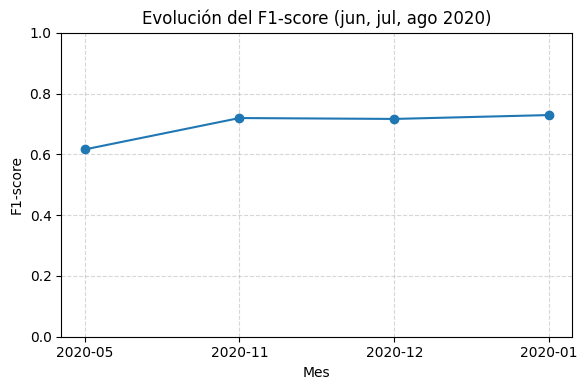

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df_res["mes"], df_res["f1_score"], marker="o", linestyle="-")
plt.title("Evolución del F1-score (jun, jul, ago 2020)")
plt.xlabel("Mes")
plt.ylabel("F1-score")
plt.ylim(0,1)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

| idx |    mes   | n\_ejemplos | f1\_score |
| :-: | :------: | :---------: | :-------: |
|  0  |  2020-05 |   346 612   |   0.6162  |
|  1  |  2020-11 |  1 501 059  |   0.7196  |
|  2  |  2020-12 |  1 453 523  |   0.7167  |
|  3  | 2021-01¹ |  6 382 762  |   0.7294  |

##  Análisis de resultados

**Mejora significativa tras mayo**  
- De un F1 de **0.616** en mayo saltamos a **~0.72** en noviembre y diciembre, y **0.729** en enero, un aumento de **~0.11–0.12** puntos (≈ 18–20 %).

**Impacto del volumen y calidad de datos**  
- Mayo (346 k ejemplos) vs enero (6.38 M): más datos estabilizan y mejoran la generalización.  
- En temporada alta (nov–dic–ene) hay flujos más regulares que en meses de menor actividad.

**Estacionalidad y cambios de comportamiento**  
- Fiestas de fin de año y vacaciones inducen patrones de viaje y propinas más predecibles.  
- Mayo (otoño) presenta mayor variabilidad climática y de demanda, lo cual puede afectar la performance.

**Recomendaciones para robustez temporal**  
1. **Entrenamiento con ventanas móviles**: incluir datos de otoño-invierno.  
2. **Añadir variables estacionales**: festivos, fin de semana vs. día laborable, condiciones climáticas.  
